In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [16]:
# Загружаем датасет Adult
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['Возраст', 'Работа', 'Вес', 'Образование', 'Образование-номер', 'Семейное положение',
           'Профессия', 'Отношения', 'Раса', 'Пол', 'Капитал-прирост', 'Капитал-убыток',
           'Часы в неделю', 'Страна', 'Доход']

data = pd.read_csv(dataset_url, header=None, names=columns, na_values=' ?')

In [17]:
# Разделение на числовые и категориальные признаки
numerical_cols = ['Возраст', 'Вес', 'Капитал-прирост', 'Капитал-убыток', 'Часы в неделю']
categorical_cols = ['Работа', 'Образование', 'Семейное положение', 'Профессия', 'Отношения', 'Раса', 'Пол', 'Страна']

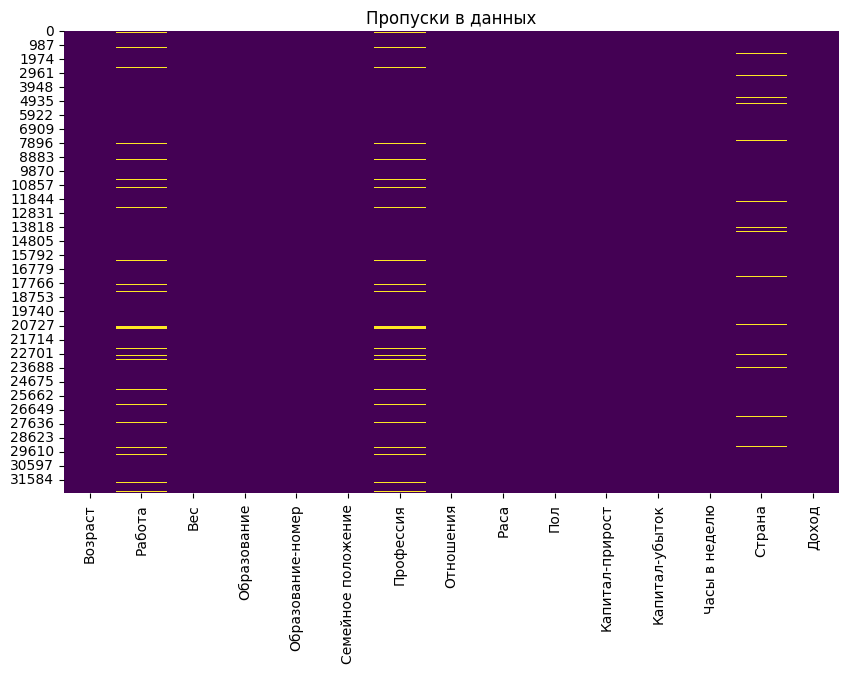

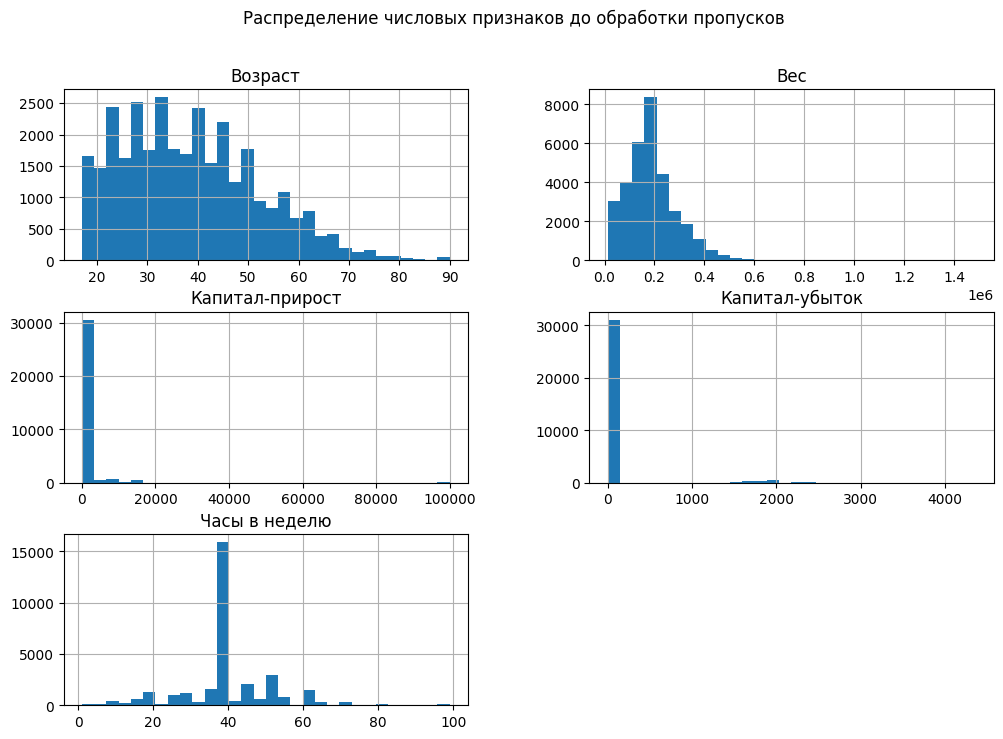

In [18]:
#Визуализация пропусков
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Пропуски в данных')
plt.show()

# Функция для визуализации распределений
def plot_distributions(data, title):
    data.hist(bins=30, figsize=(12, 8))
    plt.suptitle(title)
    plt.show()

# Функция для визуализации категориальных признаков
def plot_categorical_distribution(data, col, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(title)
    plt.show()

# Визуализация исходных числовых данных
plot_distributions(data[numerical_cols], 'Распределение числовых признаков до обработки пропусков')

In [19]:
# Обработка пропусков в числовых данных
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')

mean_filled = pd.DataFrame(imputer_mean.fit_transform(data[numerical_cols]), columns=numerical_cols)
median_filled = pd.DataFrame(imputer_median.fit_transform(data[numerical_cols]), columns=numerical_cols)
mode_filled = pd.DataFrame(imputer_most_frequent.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [20]:
# Заполнение пропусков в категориальных данных
cat_imputer_mode = SimpleImputer(strategy='most_frequent')
cat_imputer_const = SimpleImputer(strategy='constant', fill_value='Неизвестно')

filled_categorical_mode = pd.DataFrame(cat_imputer_mode.fit_transform(data[categorical_cols]), columns=categorical_cols)
filled_categorical_const = pd.DataFrame(cat_imputer_const.fit_transform(data[categorical_cols]), columns=categorical_cols)


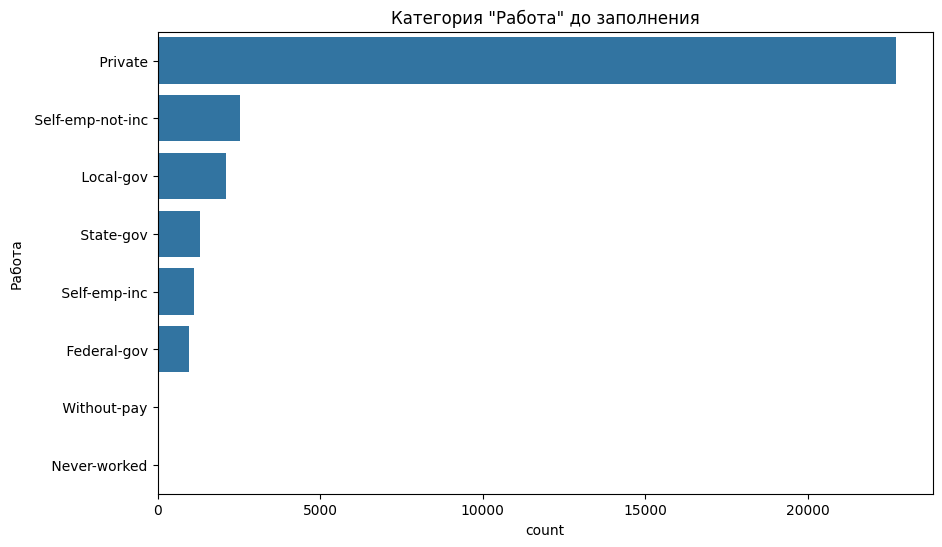

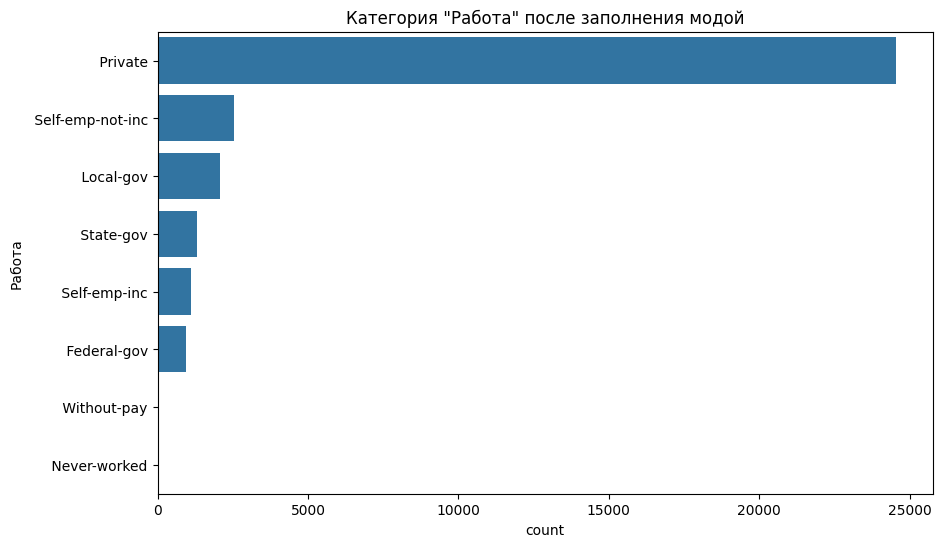

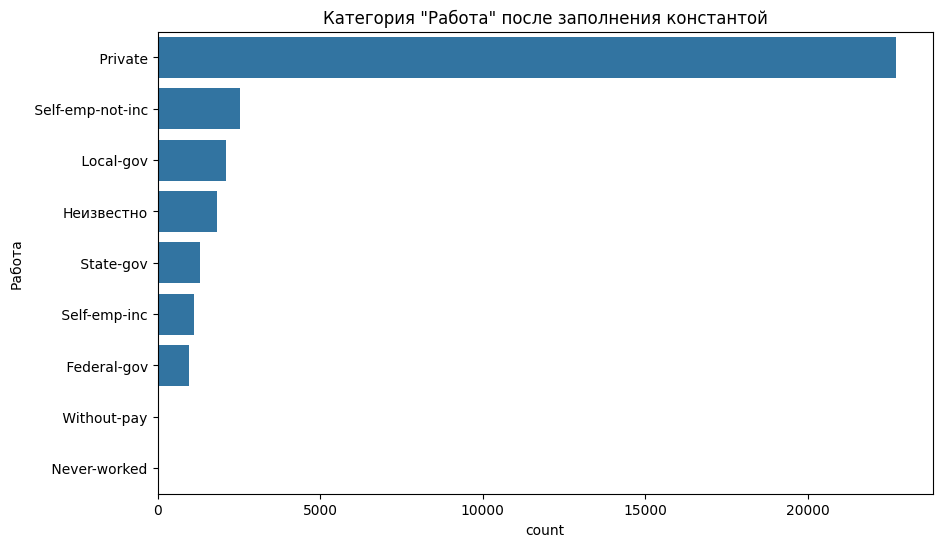

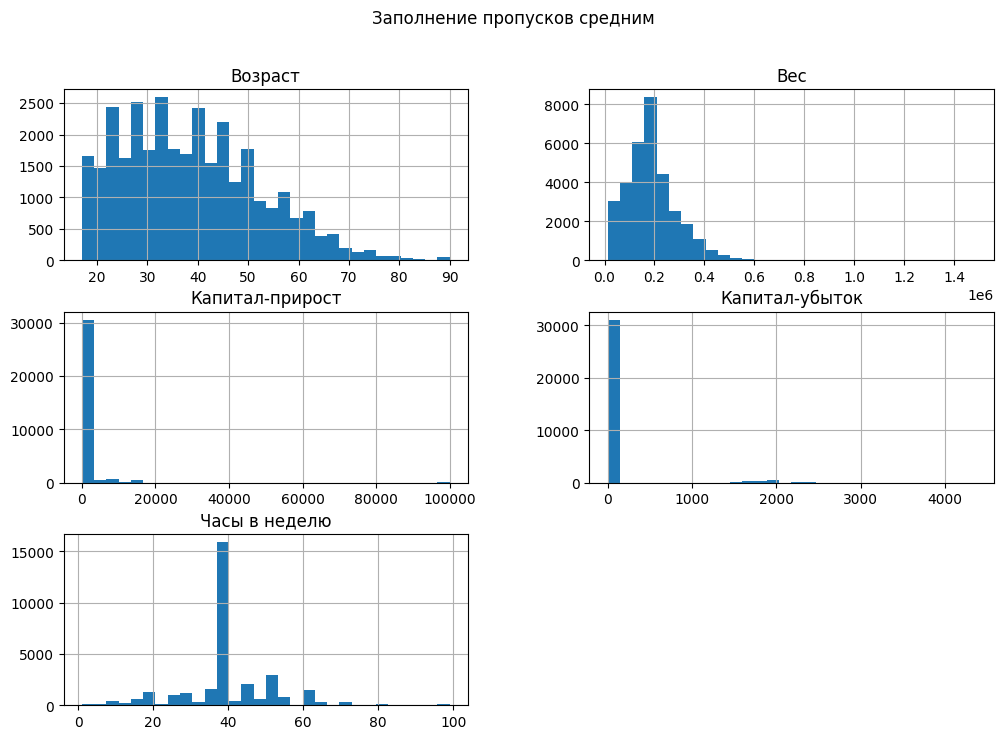

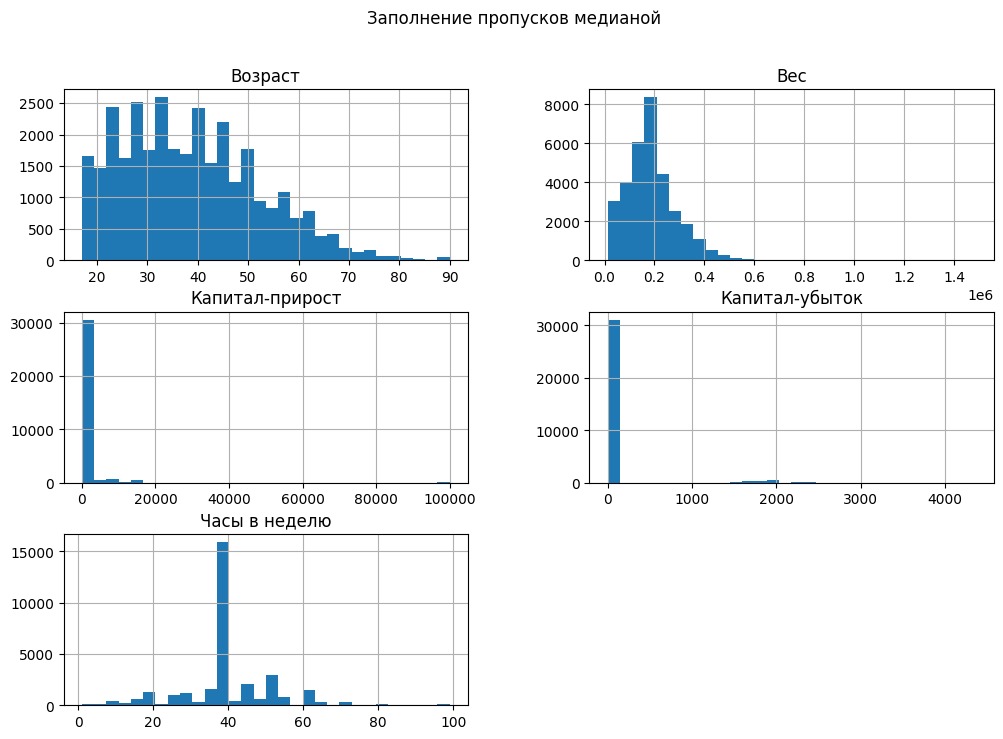

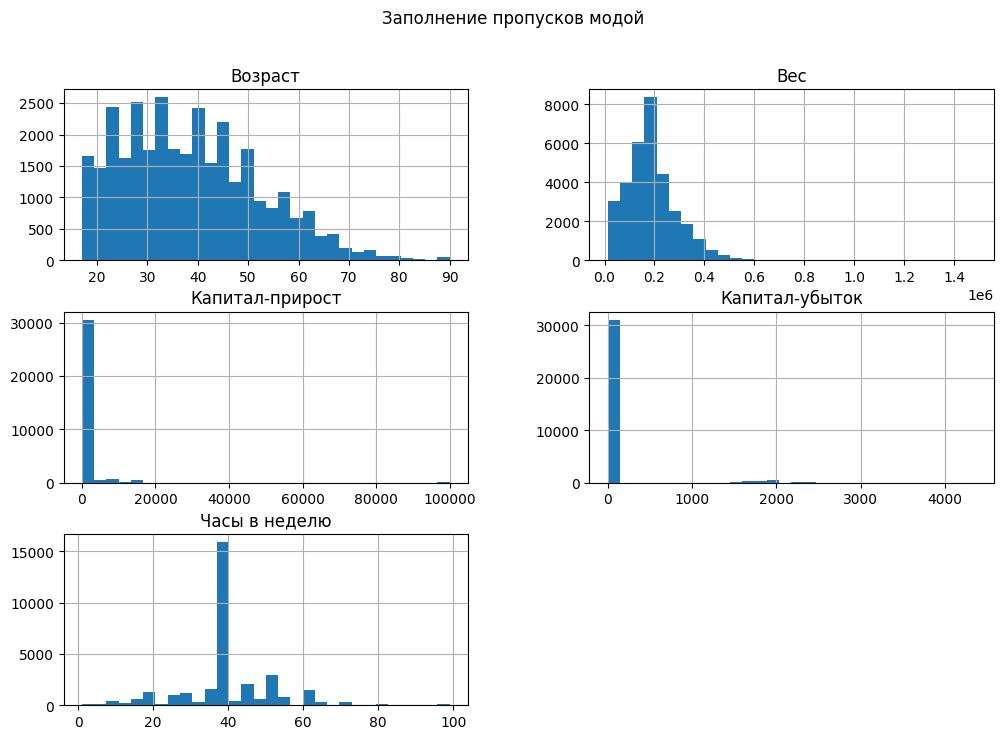

In [21]:
# Визуализация категорий до и после заполнения
plot_categorical_distribution(data, 'Работа', 'Категория "Работа" до заполнения')
plot_categorical_distribution(filled_categorical_mode, 'Работа', 'Категория "Работа" после заполнения модой')
plot_categorical_distribution(filled_categorical_const, 'Работа', 'Категория "Работа" после заполнения константой')

# Визуализация после заполнения числовых пропусков
plot_distributions(mean_filled, 'Заполнение пропусков средним')
plot_distributions(median_filled, 'Заполнение пропусков медианой')
plot_distributions(mode_filled, 'Заполнение пропусков модой')


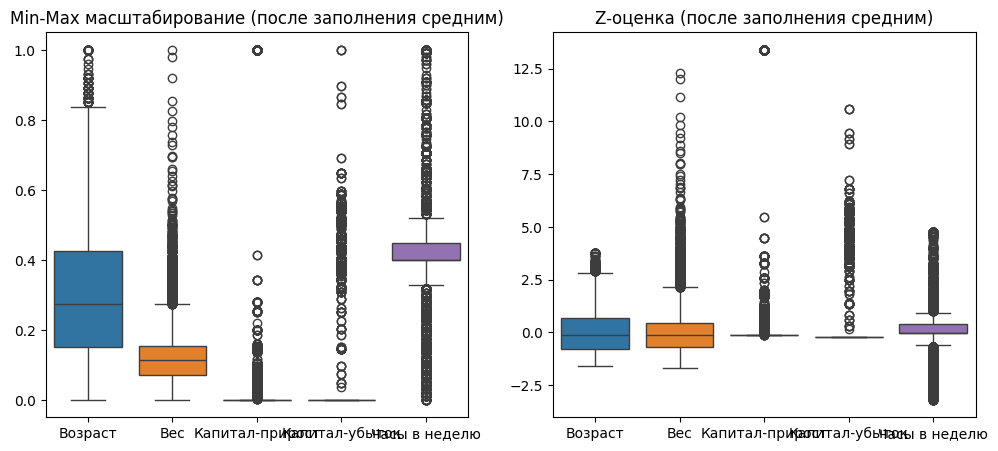

In [22]:
# Масштабирование числовых данных
scaler_minmax = MinMaxScaler()
scaler_zscore = StandardScaler()

minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(mean_filled), columns=numerical_cols)
zscore_scaled = pd.DataFrame(scaler_zscore.fit_transform(mean_filled), columns=numerical_cols)

# Визуализация масштабирования
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=minmax_scaled, ax=axes[0])
axes[0].set_title('Min-Max масштабирование (после заполнения средним)')

sns.boxplot(data=zscore_scaled, ax=axes[1])
axes[1].set_title('Z-оценка (после заполнения средним)')

plt.show()


In [ ]:
# Итоговые данные
filled_data_mode = pd.concat([mean_filled, filled_categorical_mode], axis=1)
filled_data_const = pd.concat([mean_filled, filled_categorical_const], axis=1)

print("Обработанные данные (с заполнением модой):")
print(filled_data_mode.head())

print("Обработанные данные (с заполнением константой):")
print(filled_data_const.head())